In [9]:
from utilities import *
from group_analysis_ac_functions import extract_data_from_csv

In [10]:
#PATH 
age_path = '../CreateStudy/age_data.csv'
initial_path = '../CreateStudy'

In [11]:
age_data = extract_age(age_path)

ages_for_H = age_data['H']
ages_for_S = age_data['S']


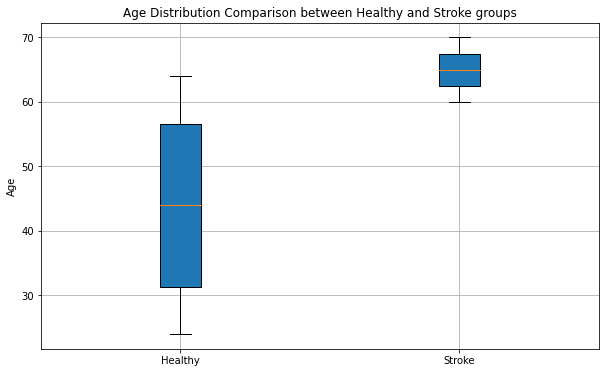

In [12]:
# Plot Boxplot
side_by_side_box_plot(ages_for_H, ages_for_S, labels=['H', 'S'], x_axis_labels=['Healthy', 'Stroke'])

In [13]:
## CORRELATION ## 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr  # Import spearmanr from scipy.stats

def plot_correlation(arat_scores, threshold_values):
    # Calculate Spearman correlation coefficient and p-value
    correlation_coef, p_value = spearmanr(arat_scores, threshold_values)

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(arat_scores, threshold_values, color='blue', label='Data Points')
    
    # Fit a linear regression line
    fit = np.polyfit(arat_scores, threshold_values, deg=1)
    plt.plot(arat_scores, np.polyval(fit, arat_scores), color='red', label='Linear Fit')
    
    plt.title('Correlation between ARAT Scores and Threshold Values')
    plt.xlabel('ARAT Scores')
    plt.ylabel('Threshold Values')
    plt.legend()
    plt.grid(True)
    
    # Display correlation coefficient and significance level
    plt.text(0.05, 0.9, f'Spearman Correlation Coefficient: {correlation_coef:.2f}\nSignificance Level (p-value): {p_value:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    # Determine and print correlation strength
    if p_value < 0.05:
        if correlation_coef > 0.7 or correlation_coef < -0.7:
            correlation_strength = "Strong"
        elif abs(correlation_coef) > 0.3:
            correlation_strength = "Moderate"
        else:
            correlation_strength = "Weak"
        print(f"Correlation Strength: {correlation_strength}")
    else:
        print("Correlation is not statistically significant (p >= 0.05)")
    
    plt.show()


In [26]:
# For Healthy Group 
# Get the AC thresholds
participant_group = 'H'
csv_file_names = ['optimal_threshold_AC.csv', 'optimal_threshold_GM.csv']
# Get the  csv file paths for each participant 
csv_files_dict = find_specific_csv_files(initial_path, csv_file_names, participant_group)
optimal_threshold_AC_path =  csv_files_dict['optimal_threshold_AC.csv']
optimal_threshold_GM_path = csv_files_dict['optimal_threshold_GM.csv']
# Get the optimal thresholds from the csv file paths 
group_optimal_threshold_AC_NDH, group_optimal_threshold_AC_DH = extract_data_from_csv(optimal_threshold_AC_path)
group_optimal_threshold_GM = extract_data_from_csv(optimal_threshold_GM_path)

In [43]:
group_optimal_threshold_AC_NDH

[2.4, 13.5, 26.38, 169.86, 25.01, 64.31, 107.3]

In [44]:
## FIX THIS ## 
# Remove the last element since analysis not done yet
age_temp = ages_for_H[:-3]

Correlation Strength: Strong


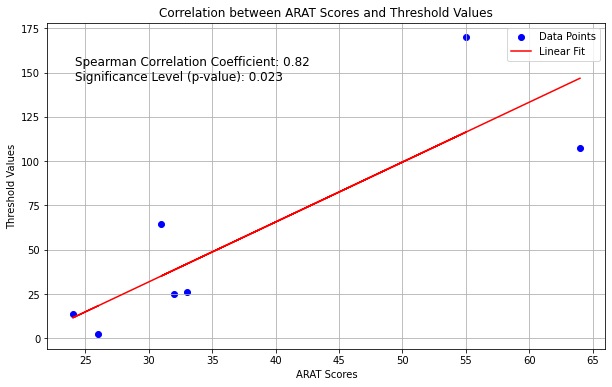

Correlation is not statistically significant (p >= 0.05)


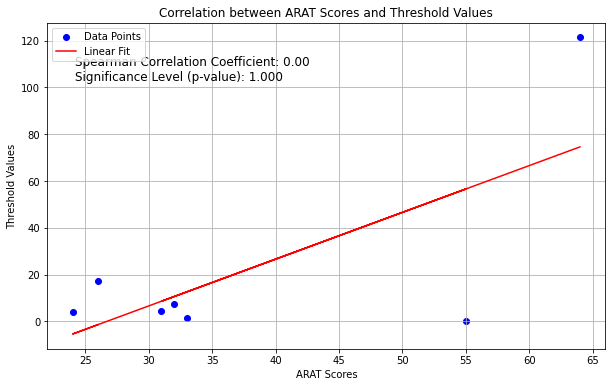

In [45]:
# Plot correlation figures 
plot_correlation(age_temp, group_optimal_threshold_AC_NDH)
plot_correlation(age_temp, group_optimal_threshold_AC_DH)

In [ ]:
arat_score=[None, 3]